# **PREDICITNG MEDICAL COSTS**

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
print(df.describe(include='all'))

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   int64  
 1   sex       1333 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1333 non-null   int64  
 4   smoker    1333 non-null   object 
 5   region    1333 non-null   object 
 6   charges   1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.0+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
df['sex'].value_counts()

sex
male      671
female    662
Name: count, dtype: int64

In [18]:
df['smoker'].value_counts()

smoker
no     1060
yes     273
Name: count, dtype: int64

In [19]:
df['region'].value_counts()

region
southeast    360
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

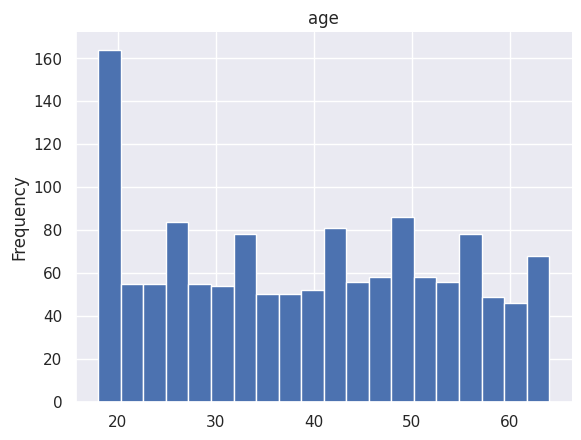

In [27]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

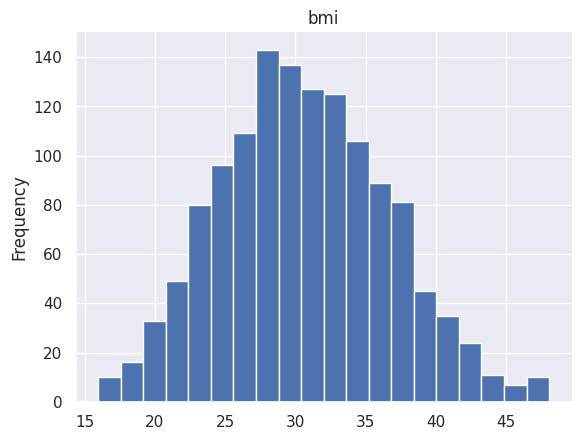

In [31]:
#  bmi

from matplotlib import pyplot as plt
df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='age', ylabel='charges'>

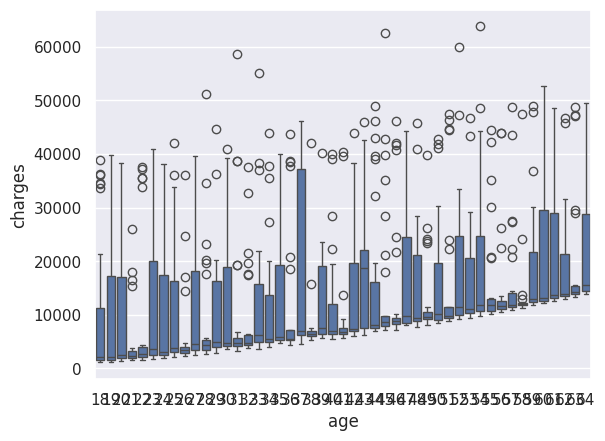

In [26]:
#age
sns.boxplot(x = "age", y = "charges", data = df)

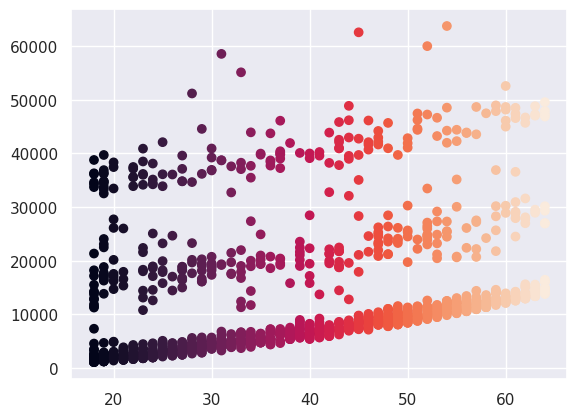

In [29]:
# Charges vs Age

import matplotlib.pyplot as plt
_ = plt.scatter(df['age'], df['charges'], c=df['age'])

In [8]:
import plotly.express as px

fig = px.scatter(df, x='age', y='charges', color='smoker',title='Insurance Charges by Age and Smoking Status',labels={'charges': 'Insurance Charges', 'age': 'Age'})
fig.show()

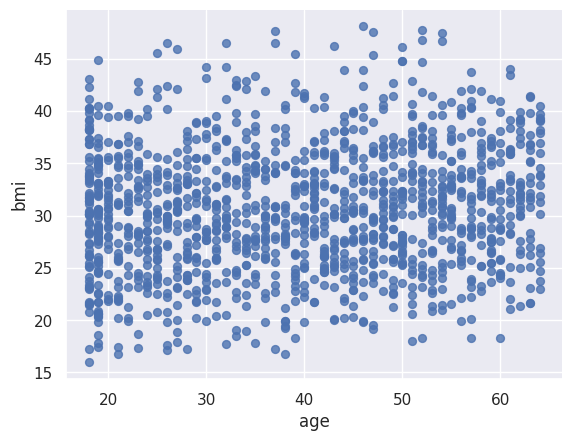

In [33]:
# age vs bmi

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
fig = px.histogram(df, x='charges', color='smoker',title='Distribution of Insurance Charges by Smoking Status',labels={'charges': 'Insurance Charges'})
fig.show()

In [10]:
fig = px.box(df, x='region', y='bmi',title='BMI Distribution by Region',labels={'bmi': 'BMI', 'region': 'Region'})
fig.show()

In [11]:
def remove_outliers(df, feature):
    q1 = df[feature].quantile(0.24)
    q3 = df[feature].quantile(0.76)
    r = q3 - q1
    outliers = df[(df[feature] < q1 - 1.5 * r) | (df[feature] > q3 + 1.5 * r)]

    df = df.drop(outliers.index)
    df = df.reset_index(drop=True)
    return df
df.shape[0]

1337

In [12]:
df = remove_outliers(df, 'bmi')
df.shape[0]

1333

In [13]:
fig = px.box(df, x='region', y='bmi',title='BMI Distribution by Region',labels={'bmi': 'BMI', 'region': 'Region'})
fig.show()

In [14]:
fig = px.bar(df, x='region', y='charges', color='smoker', barmode='group',title='Average Insurance Charges by Region and Smoking Status',labels={'charges': 'Average Insurance Charges', 'region': 'Region'})
fig.show()

In [43]:
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [53]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_new = X_test
y_new = y_test

In [40]:
from sklearn.linear_model import LinearRegression

# Pipeline for Linear Regression
linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
linear_pipeline.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_pipeline.predict(X_new)
print("Predictions with Linear Regression:", linear_predictions)

Predictions with Linear Regression: [39436.31557115 12801.93331978 10444.38295374 10171.17010095
 26017.20771798  2161.44099039  4805.95595254 13774.017674
 11669.19300553 11535.41623784 10313.37351771 13627.7257681
  4917.77456385 30725.21051338 30769.24664273  7390.19897273
 10536.20606816 32098.39312395  3951.26798614  4900.09373008
 35249.63787552  8229.90578439 14183.56726232 13821.79937272
 31558.57916294  5487.1788575  14052.68960132  9357.72237489
 14987.75927046  5122.64884333 10365.25415973  7837.45618357
  8465.76784467  7114.83319273 11637.01549979  5420.67410606
  4390.47280725  3844.62266275  8482.67927612 11025.36235765
  7244.78457694  1883.7572936  11488.68909417  5144.39187067
 12960.79625966 14672.09698152 16723.58727218 14804.42396896
  4191.14210053  8931.34337361 15342.14006943 11928.89231826
  8728.29895597 26698.19595216 33351.61284325 36703.63272857
  7438.76646937 11794.63015382 31524.12727353 12996.85450466
  7147.09041703 10953.11993991  8492.67622394   371.

In [55]:
# Calculating evaluation metrics
mse = mean_squared_error(y_new, linear_predictions)  # Mean Squared Error
rmse = mean_squared_error(y_new, linear_predictions, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_new, linear_predictions)  # Mean Absolute Error
r2 = r2_score(y_new, linear_predictions)  # R^2 Score

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 39089978.62491371
Root Mean Squared Error (RMSE): 6252.197903530702
Mean Absolute Error (MAE): 4333.8515833761485
R² Score: 0.7633191656969782


In [41]:
from sklearn.linear_model import Ridge

# Pipeline for Ridge Regression
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Fit the model
ridge_pipeline.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_pipeline.predict(X_new)
print("Predictions with Ridge Regression:", ridge_predictions)


Predictions with Ridge Regression: [39377.71518613 12817.34411597 10452.45582787 10180.16169556
 25967.52500433  2183.78800772  4819.42206615 13789.22060512
 11685.24323131 11547.603898   10320.84809985 13632.47377794
  4936.18659131 30667.58196427 30713.34910684  7409.27692196
 10549.55821816 32048.3975311   3971.05981524  4920.41427081
 35192.69373128  8245.10387238 14193.20888052 13830.39648467
 31498.85750211  5500.66465503 14057.5419386   9366.68084277
 14990.56347128  5135.03377848 10376.0190027   7851.69289034
  8475.24883725  7131.55574612 11647.48431612  5438.21395755
  4408.23814799  3862.12214678  8491.69475337 11042.43899088
  7252.88570447  1905.09917805 11504.67521971  5158.24745538
 12964.16954414 14677.46749808 16728.63784982 14804.8434676
  4206.52561558  8951.31451919 15346.23651856 11941.86001332
  8747.36775388 26644.34042325 33292.51752146 36641.05148573
  7453.60530599 11800.87501418 31474.62972185 13005.55113253
  7166.14616866 10964.45783388  8499.31763037   396

In [57]:
mse_ridge = mean_squared_error(y_new, ridge_predictions)  # Mean Squared Error
rmse_ridge = mean_squared_error(y_new, ridge_predictions, squared=False)  # Root Mean Squared Error
mae_ridge = mean_absolute_error(y_new, ridge_predictions)  # Mean Absolute Error
r2_ridge = r2_score(y_new, ridge_predictions)  # R^2 Score

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"R² Score: {r2_ridge}")

Mean Squared Error (MSE): 39120280.65110773
Root Mean Squared Error (RMSE): 6254.620743986619
Mean Absolute Error (MAE): 4338.921980096083
R² Score: 0.7631356938944098


In [45]:
from sklearn.linear_model import Lasso

# Pipeline for Lasso Regression
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

# Fit the model
lasso_pipeline.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso_pipeline.predict(X_new)
print("Predictions with Lasso Regression:", lasso_predictions)


Predictions with Lasso Regression: [39430.3179608  12802.75844189 10449.47512094 10169.71760314
 26008.44354258  2171.10821539  4807.45212375 13775.95949557
 11672.13064382 11529.02914867 10313.94480355 13625.33264747
  4924.62877279 30719.9458905  30759.81556356  7399.32463388
 10529.01854931 32095.1885472   3959.10857734  4908.97993029
 35248.87036687  8231.60690384 14187.58004131 13822.96763441
 31550.38789753  5485.23576519 14057.54998043  9356.77882867
 14983.08385555  5120.8840186  10364.5641724   7831.77374101
  8464.39264832  7111.13535338 11631.76773779  5423.61169414
  4396.85998808  3845.98643827  8483.20183597 11029.14877336
  7241.77781949  1881.65879682 11491.23582811  5145.28875022
 12958.09055971 14664.19732598 16721.50753818 14799.26160786
  4191.95847183  8934.39332153 15344.91970629 11935.3978451
  8732.129192   26693.04795365 33339.06805209 36687.28562361
  7436.71523989 11790.7539834  31520.93365185 13000.20952059
  7154.45229132 10948.37843067  8488.97103287   379

In [58]:
# Calculating evaluation metrics
mse_lasso = mean_squared_error(y_new, lasso_predictions)  # Mean Squared Error
rmse_lasso = mean_squared_error(y_new, lasso_predictions, squared=False)  # Root Mean Squared Error
mae_lasso = mean_absolute_error(y_new, lasso_predictions)  # Mean Absolute Error
r2_lasso = r2_score(y_new, lasso_predictions)  # R² Score

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"R² Score: {r2_lasso}")

Mean Squared Error (MSE): 39088652.51135185
Root Mean Squared Error (RMSE): 6252.091850840953
Mean Absolute Error (MAE): 4333.652252711112
R² Score: 0.7633271950097392


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline for Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_pipeline.predict(X_new)
print("Predictions with Random Forest:", rf_predictions)

Predictions with Random Forest: [47906.5655026  10830.3567159   6533.9294351   9865.1619043
 20191.7420887   2814.2769196  11530.2997043  15144.6355361
 11657.1198217  10647.0163056  11857.3072506  14754.3645664
  2260.560988   20190.1591949  21259.704268    8998.2720044
 11142.1631248  39275.816319    2450.263939    5385.9912255
 43775.368444    5289.132941   11593.4333321  12049.9764485
 37465.5992685  18050.8741739  12843.5431546   9919.1115857
 17283.7255679   2078.3369825  12919.5983709   6022.2207265
  7259.2388904   8940.372542   10297.7178216   4525.7450428
 10040.625563    6083.2182648  15616.2199048  10981.6750588
  2887.3963845   2270.2056      8906.2164909   6230.4501927
 12716.8780244  14192.7716852  13667.9878255  12247.1362099
  6315.1101988  11717.1070657  14131.9813395  13505.804627
  5954.6962635  19621.7326985  39394.058644   45203.3682865
  9961.463671    8236.7966958  38645.8290749  11551.7562114
  6684.4846734   9944.1293045   3523.7640636   3948.8004121
  8587.36

In [59]:
# Calculating evaluation metrics
mse_rf = mean_squared_error(y_new, rf_predictions)  # Mean Squared Error
rmse_rf = mean_squared_error(y_new, rf_predictions, squared=False)  # Root Mean Squared Error
mae_rf = mean_absolute_error(y_new, rf_predictions)  # Mean Absolute Error
r2_rf = r2_score(y_new, rf_predictions)  # R² Score

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R² Score: {r2_rf}")

Mean Squared Error (MSE): 23639144.421759903
Root Mean Squared Error (RMSE): 4862.010327195933
Mean Absolute Error (MAE): 2692.0833840540754
R² Score: 0.8568704148539527


In [48]:
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline for Gradient Boosting Machine
gbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Fit the model
gbm_pipeline.fit(X_train, y_train)

# Make predictions
gbm_predictions = gbm_pipeline.predict(X_new)
print("Predictions with Gradient Boosting Machine:", gbm_predictions)

Predictions with Gradient Boosting Machine: [46147.46887705 10327.62552561  6326.56459336  9839.49310745
 19597.57746134  2876.00912349  7756.39735376 16142.39475511
 11641.75241221 10471.16059299 11964.32802361 14323.40994757
  2461.85757917 21614.54456062 20824.49906842 11061.12976347
  9521.97356863 38833.73421145  2684.5322103   5110.48281021
 45719.72429337  6033.45815954 11771.33757199 12661.2752678
 38501.41931911  7185.01548191 14426.45479147 10324.74063329
 15258.54749948  3253.43991428 12764.04131232  6468.28453639
  9133.03311497  8619.70706787 11740.51365121  4393.33695672
  6883.8758153   6116.77283332 11603.03434862 11586.59170985
  4369.99428344  4437.11530702  9816.93406098  5089.9143696
 12968.8008947  15071.77000446 12361.77536949 11466.699126
  5704.51983407  8026.46214391 15051.0667398  15012.767183
  6031.10395738 20527.60716816 39283.63407758 44263.6692135
  9458.16165319  8598.59203521 39104.9893405  13083.17555052
  7109.04832649 11502.05415853  4852.23679206  2

In [60]:
# Calculating evaluation metrics
mse_gbm = mean_squared_error(y_new, gbm_predictions)  # Mean Squared Error
rmse_gbm = mean_squared_error(y_new, gbm_predictions, squared=False)  # Root Mean Squared Error
mae_gbm = mean_absolute_error(y_new, gbm_predictions)  # Mean Absolute Error
r2_gbm = r2_score(y_new, gbm_predictions)  # R² Score

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_gbm}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbm}")
print(f"Mean Absolute Error (MAE): {mae_gbm}")
print(f"R² Score: {r2_gbm}")

Mean Squared Error (MSE): 20090229.73327119
Root Mean Squared Error (RMSE): 4482.21259349344
Mean Absolute Error (MAE): 2403.0242005697414
R² Score: 0.8783582774440442


In [62]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42))
])

# Splitting data into features and target variable
X = df.drop('charges', axis=1)  # 'charges' is the target variable
y = df['charges']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
xgb_pipeline.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_pipeline.predict(X_test)
print("Predictions with XGBoost:", xgb_predictions)

Predictions with XGBoost: [48042.574   9833.427   5892.941   9995.921  19308.143   1917.2072
 13287.252  14667.53   11170.538   9984.59   12017.861  13106.252
  1549.4594 19196.379  21288.514  10475.759   9509.767  39483.07
  1506.3813  4512.03   43789.164   5494.41   10485.787  11598.207
 36575.19   10381.734  13326.738  10806.786  15155.952   2259.3914
 13636.057   7970.0757  7741.634   7398.2715  9990.8955  3396.8171
 12770.203   4437.0977 12551.076  10965.815   3656.9775  3133.9714
  9185.951   7378.7134 12686.385  17308.518  13035.787  10966.588
  6210.913   7752.9634 16050.792  12977.342   5858.517  18843.328
 38933.08   49387.305   8514.361  10921.1045 39020.984  11023.104
  7048.75    9930.71    3330.858   2197.946   9404.219  45046.973
  7882.617   4329.9277 24253.234  16099.509  19943.215   3098.1616
  6491.253   6414.7817 31915.549  16019.472  15966.122  10760.3545
 34982.875  12408.834   5673.77    3292.7588 10413.401  11060.65
 10126.479   5078.312   2928.3982 43135.09    

In [63]:
mse_xgb = mean_squared_error(y_new, xgb_predictions)  # Mean Squared Error
rmse_xgb = mean_squared_error(y_new, xgb_predictions, squared=False)  # Root Mean Squared Error
mae_xgb = mean_absolute_error(y_new, xgb_predictions)  # Mean Absolute Error
r2_xgb = r2_score(y_new, xgb_predictions)  # R² Score

# Printing the metrics
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"R² Score: {r2_xgb}")

Mean Squared Error (MSE): 24182473.87964768
Root Mean Squared Error (RMSE): 4917.567882566308
Mean Absolute Error (MAE): 2669.691873750585
R² Score: 0.8535806798907227


In [64]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(gbm_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))

# Predict using the best model.
best_gbm = grid_search.best_estimator_
predictions_gbm = best_gbm.predict(X_new)
print("Optimized predictions with GBM:", predictions_gbm)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best cross-validation score: 20811002.32
Optimized predictions with GBM: [46305.57486868 10998.69839271  6373.82894567 10427.51576583
 20071.63612027  3281.76842383  7422.45031707 16056.57621423
 11925.08987134 11135.25498034 12435.34021896 14039.2146945
  3224.65389388 21853.47923591 21145.23749147  9636.51256189
  9305.08053696 39072.55482581  3258.84693877  5690.63546698
 44191.32726079  6349.21166748 12638.06793377 12689.3078514
 38687.72758206  6906.90547881 14444.88637685 10025.02242988
 14887.69577944  3336.24606328 13377.06674624  5825.3760908
  8707.17969824  8596.30757123 12010.05610776  4720.43603453
  7086.04052367  6656.55391495 10788.78533356 11834.10136605
  4419.20416935  4502.86782279 10163.28425443  5254.16136394
 12648.75

In [65]:
# Calculate evaluation metrics
mse_gbm = mean_squared_error(y_new, predictions_gbm)  # Mean Squared Error
rmse_gbm = mean_squared_error(y_new, predictions_gbm, squared=False)  # Root Mean Squared Error
mae_gbm = mean_absolute_error(y_new, predictions_gbm)  # Mean Absolute Error
r2_gbm = r2_score(y_new, predictions_gbm)  # R² Score

# Optional: Calculate Adjusted R² Score
n = X_new.shape[0]  # number of observations
p = X_new.shape[1]  # number of features
adjusted_r2_gbm = 1 - (1 - r2_gbm) * (n - 1) / (n - p - 1)  # Adjusted R² Score

# Print the metrics
print(f"Optimized Mean Squared Error (MSE): {mse_gbm:.2f}")
print(f"Optimized Root Mean Squared Error (RMSE): {rmse_gbm:.2f}")
print(f"Optimized Mean Absolute Error (MAE): {mae_gbm:.2f}")
print(f"Optimized R² Score: {r2_gbm:.4f}")
print(f"Optimized Adjusted R² Score: {adjusted_r2_gbm:.4f}")

Optimized Mean Squared Error (MSE): 19431189.28
Optimized Root Mean Squared Error (RMSE): 4408.08
Optimized Mean Absolute Error (MAE): 2433.96
Optimized R² Score: 0.8823
Optimized Adjusted R² Score: 0.8796
